# EE 399
### Ting Jones
### 4/18/23
### HW 2



In [1]:
# github page: https://github.com/tingjones
# HW 2 repo: https://github.com/tingjones/ee399_hw2

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

## Problem A

In [3]:
# load data and save images into X
results=loadmat('yalefaces.mat')
X=results['X']

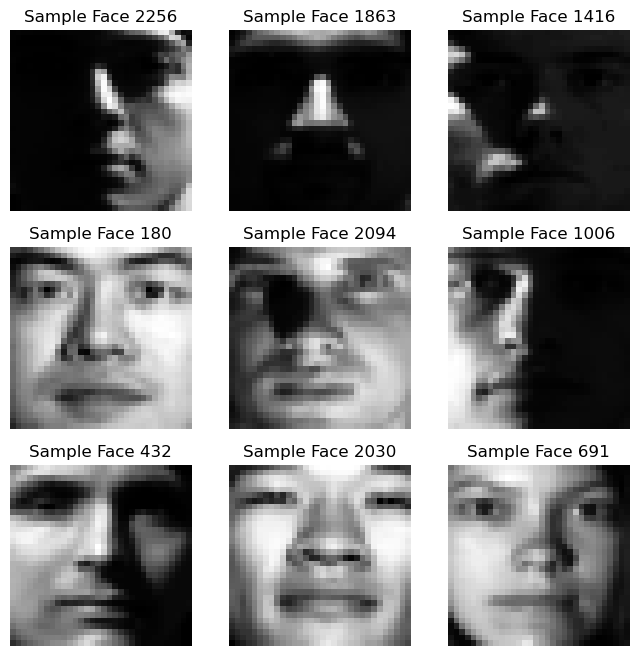

In [4]:
import random
# view random sample images in grayscale
fig = plt.figure(figsize=(8,8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    image_sel = random.randrange(0, 2415)
    ax.imshow(X[:, image_sel].reshape((32, 32), order='F').T, cmap="Greys_r")
    plt.title("Sample Face " + str(image_sel + 1))
    plt.axis('off')

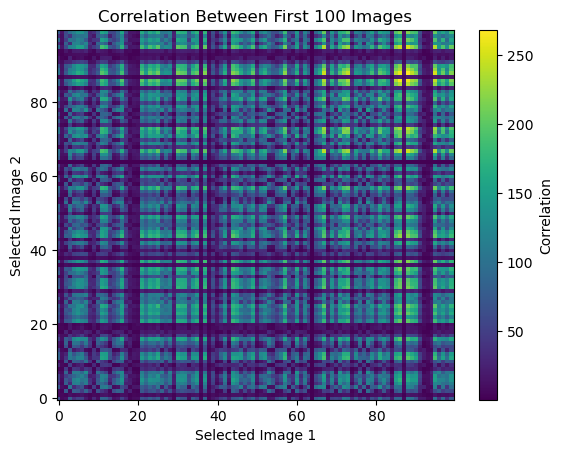

In [5]:
# get first 100 images
hundr = X[:, :100]
C = np.ndarray((100, 100))

# correlation matrix C, dot product between first 100 images
C = np.dot(hundr.T, hundr)

# plot the correlation matrix
fig, ax = plt.subplots()
ab = ax.pcolor(range(0, 100), range(0, 100), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Selected Image 1")
ax.set_ylabel("Selected Image 2")
fig.colorbar(ab, ax=ax, label="Correlation")

## Problem B

In [6]:
# get the most correlated images
most = np.argwhere(C == np.max(C))[0]

# get the least correlated images
least = np.argwhere(C == np.min(C))[0]

print("Initial Findings:\nMost:", most,"Least:", least) # first image and second image

# notice that images are the same, repeat process
# but with the next greatest/least correlation when indices are different
most = np.argwhere(C == np.sort(C.flatten())[-3])[0]
least = np.argwhere(C == np.sort(C.flatten())[1])[0]
print("Final Findings:\nMost:", most,"Least:", least)

Initial Findings:
Most: [88 88] Least: [64 64]
Final Findings:
Most: [86 88] Least: [54 64]


Text(0.5, 0.85, 'Least Correlated Faces')

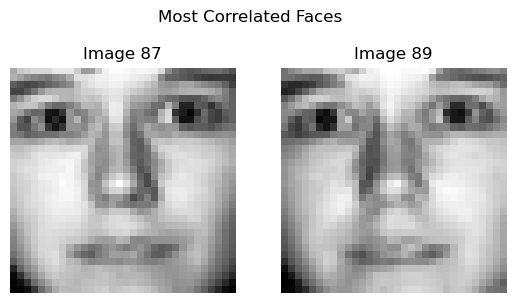

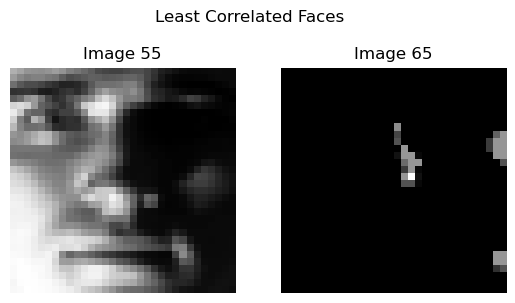

In [7]:
# plot the most correlated
fig1 = plt.figure()
for i in range(2):
    corr = X[:, most[i]].reshape((32, 32), order='F').T
    ax = fig1.add_subplot(1, 2, i+1)
    ax.imshow(corr, cmap="Greys_r")
    ax.set_title("Image " + str(most[i]+1))
    plt.axis('off')
fig1.suptitle("Most Correlated Faces", y=.85)

# plot the least correlated
fig2 = plt.figure()
for i in range(2):
    corr = X[:, least[i]].reshape((32, 32), order='F').T
    ax = fig2.add_subplot(1, 2, i+1)
    ax.imshow(corr, cmap="Greys_r")
    ax.set_title("Image " + str(least[i]+1))
    plt.axis('off')
fig2.suptitle("Least Correlated Faces", y=.85)

## Problem C

In [8]:
# image list to get
img_list = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]

# get desired images from dataset
get_img = X[:, np.subtract(img_list, 1)]

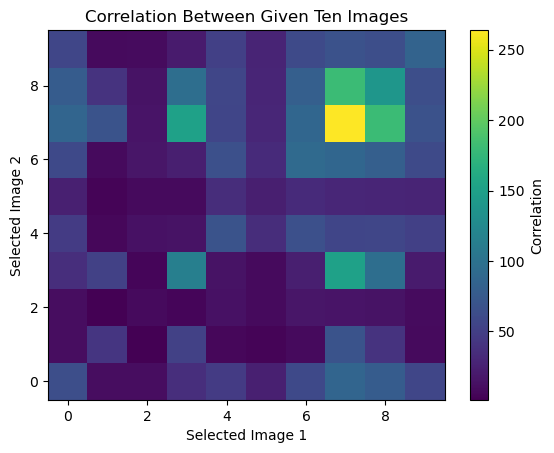

In [9]:
# array to store correlation between the ten images
C = np.ndarray((10, 10))
# find the correlation matrix
C = np.dot(get_img.T, get_img)

# plot the correlation matrix
fig, ax = plt.subplots()
corr = ax.pcolor(range(0, 10), range(0, 10), C, vmin=np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between Given Ten Images")
ax.set_xlabel("Selected Image 1")
ax.set_ylabel("Selected Image 2")
fig.colorbar(corr, ax=ax, label="Correlation")

Initial Findings:
Most: [7 7] Least: [1 2]
Final Findings:
Most: [7 8] Least: [1 2]


Text(0.5, 0.85, 'Least Correlated Faces')

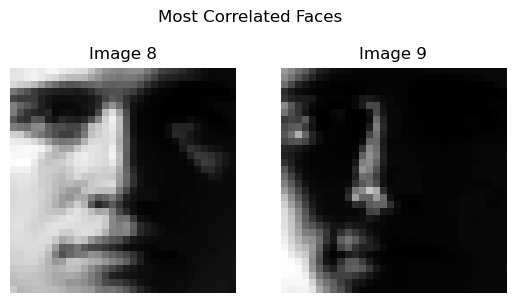

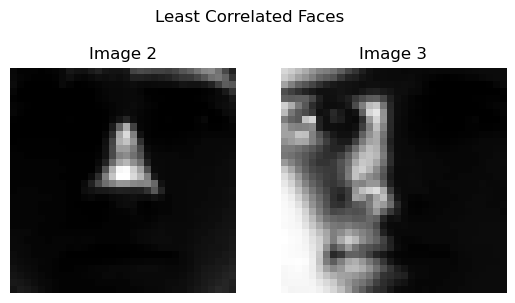

In [10]:
# get the most correlated images
most = np.argwhere(C == np.max(C))[0]

# get the least correlated images
least = np.argwhere(C == np.min(C))[0]

print("Initial Findings:\nMost:", most,"Least:", least)

# notice that images are the same, repeat process
# but with the next greatest/least correlation when indices are different
most = np.argwhere(C == np.sort(C.flatten())[-3])[0]
least = np.argwhere(C == np.sort(C.flatten())[1])[0]
print("Final Findings:\nMost:", most,"Least:", least)

fig1 = plt.figure()
for i in range(2):
    corr = X[:, most[i]].reshape((32, 32), order='F').T
    ax = fig1.add_subplot(1, 2, i+1)
    ax.imshow(corr, cmap="Greys_r")
    ax.set_title("Image " + str(most[i]+1))
    plt.axis('off')
fig1.suptitle("Most Correlated Faces", y=.85)

fig2 = plt.figure()
for i in range(2):
    corr = X[:, least[i]].reshape((32, 32), order='F').T
    ax = fig2.add_subplot(1, 2, i+1)
    ax.imshow(corr, cmap="Greys_r")
    ax.set_title("Image " + str(least[i]+1))
    plt.axis('off')
fig2.suptitle("Least Correlated Faces", y=.85)

## Problem D

In [11]:
import scipy
from scipy.sparse.linalg import eigs

In [12]:
Y = np.matmul(X, X.T)

# eigenvalues stored in w
# eigenvectors stored in v as an array,
    # with the eigenvector corresponding to eigenvalue [i] is v[:, i]
# LM - find k=6 eigenvalues with the Largest Magnitude
w, v = scipy.sparse.linalg.eigs(Y, k=6, which="LM")

for i in range(0, 6):
    print("Eigenvalue:", np.real(w[i]))
    print("Eigenvector:", np.real(v[:, i]))

Eigenvalue: 234020.45485388592
Eigenvector: [-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
Eigenvalue: 49038.31530059235
Eigenvector: [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]
Eigenvalue: 8236.539897013146
Eigenvector: [0.05653196 0.04709124 0.0362807  ... 0.06455006 0.06196898 0.05241684]
Eigenvalue: 6024.871457930176
Eigenvector: [-0.04441826 -0.05057969 -0.05522219 ...  0.01006919  0.00355905
 -0.00040934]
Eigenvalue: 2051.4964326910485
Eigenvector: [-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412]
Eigenvalue: 1901.0791148236624
Eigenvector: [0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028]


## Problem E

In [13]:
# U are eigenvectors of AA^H, V are eigenvectors of A^H A
# S = np.diag(s), eigenvalues are s**2
u, s, vh = np.linalg.svd(X)
dir = u[:, :6]
print(dir, dir.shape)

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]] (1024, 6)


## Problem F

In [14]:
v1 = np.real(v[:, 0]) # all elements have +0j
u1 = dir[:, 0]
print("v1 from D:\n", v1)
print("u1 from E:\n", u1)

# match format with decimal places for better viewing

for i in range(10, 16):
    v1_comp = np.round(v1, i)
    u1_comp = np.round(u1, i)
    print("Elements match to the ", i, "th place? ", np.all(v1_comp == u1_comp), sep="")


v1 from D:
 [-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
u1 from E:
 [-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
Elements match to the 10th place? True
Elements match to the 11th place? True
Elements match to the 12th place? True
Elements match to the 13th place? True
Elements match to the 14th place? False
Elements match to the 15th place? False


In [15]:
norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of difference of absolute values:", norm)

Norm of difference of absolute values: 1.6670647475993934e-15


## Problem G

In [16]:
# proportion of the variation is the eigenvalue divided by the sum of the eigenvalues
# eigenvalues are found with s**2, the diagonal values of the matrix, S
# the variance of the data along an eigenvector is the eigenvalue corresponding to that eigenvector
var = s[:6] ** 2 / dir.shape[1]
prop_var = var/np.sum(var) * 100
print("Percentage of Variance captured by each of the first 6 SVD modes:")

for i in range(6):
    print("Mode ", i+1, ": ", round(prop_var[i], 3), "%", sep="")

Percentage of Variance captured by each of the first 6 SVD modes:
Mode 1: 77.677%
Mode 2: 16.277%
Mode 3: 2.734%
Mode 4: 2.0%
Mode 5: 0.681%
Mode 6: 0.631%


Text(0.5, 0.98, 'First 6 SVD Modes')

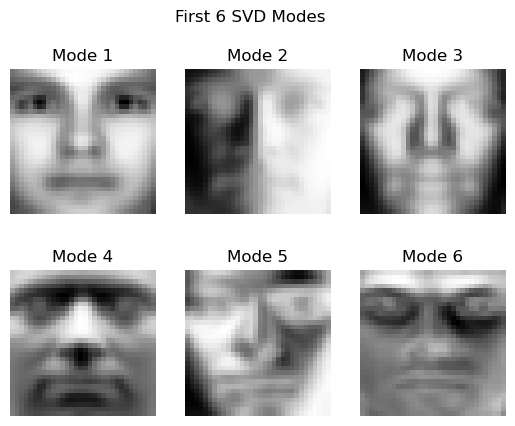

In [17]:
# plot first 6 SVD modes
fig = plt.figure()
for i in range(6):
    mode = dir[:, i].reshape((32, 32), order='F').T
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(mode, cmap="Greys")
    plt.title("Mode " + str(i+1))
    plt.axis('off')
fig.suptitle("First 6 SVD Modes")